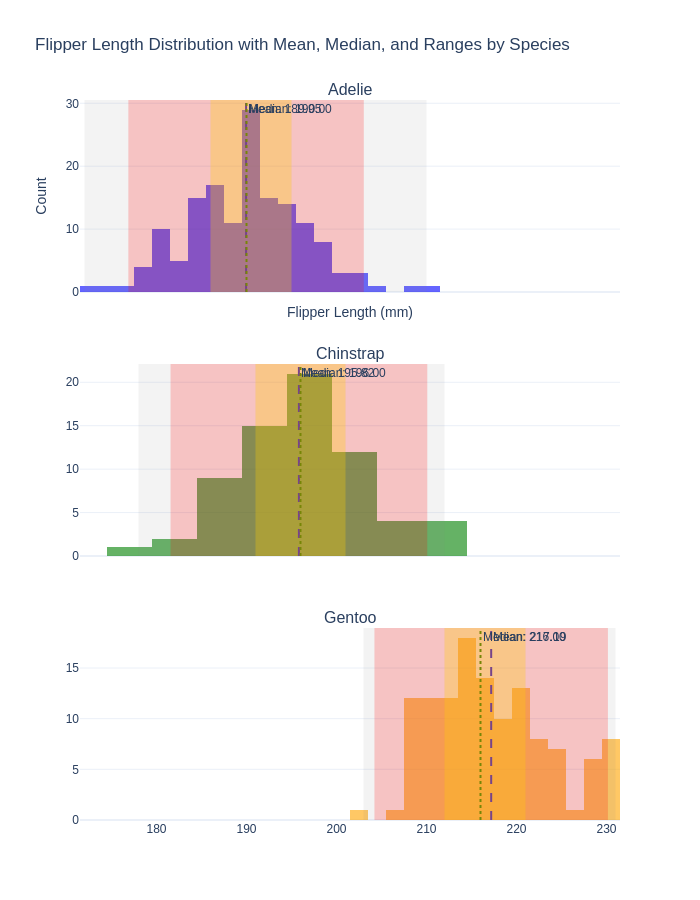

In [33]:
#Pre-Lecture

#1
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

import plotly.graph_objects as go
import plotly.subplots as sp

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing 'flipper_length_mm' or 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Function to calculate statistics for each species
def get_species_stats(df, species_name):
    species_df = df[df['species'] == species_name]
    mean_fl = species_df['flipper_length_mm'].mean()
    median_fl = species_df['flipper_length_mm'].median()
    min_fl = species_df['flipper_length_mm'].min()
    max_fl = species_df['flipper_length_mm'].max()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)
    std_fl = species_df['flipper_length_mm'].std()
    
    return {
        'mean': mean_fl,
        'median': median_fl,
        'min': min_fl,
        'max': max_fl,
        'q1': q1,
        'q3': q3,
        'std': std_fl
    }

# Get species list
species_list = penguins['species'].unique()

# Create subplots for each species
fig = sp.make_subplots(rows=len(species_list), cols=1, shared_xaxes=True, 
                       subplot_titles=species_list, vertical_spacing=0.1)

# Define colors for each species
colors = ['blue', 'green', 'orange']

for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]
    stats = get_species_stats(penguins, species)
    
    # Add histogram for each species
    fig.add_trace(go.Histogram(
        x=species_data['flipper_length_mm'],
        name=species,
        opacity=0.6,
        marker=dict(color=colors[i]),
        showlegend=False
    ), row=i+1, col=1)
    
    # Add vertical lines for mean and median
    fig.add_vline(x=stats['mean'], line_width=2, line_dash="dash", line_color='blue',
                  annotation_text=f'Mean: {stats["mean"]:.2f}', row=i+1, col=1)
    fig.add_vline(x=stats['median'], line_width=2, line_dash="dot", line_color='green',
                  annotation_text=f'Median: {stats["median"]:.2f}', row=i+1, col=1)
    
    # Add rectangles for ranges (min-max, IQR, and ±2 std from mean)
    fig.add_vrect(x0=stats['min'], x1=stats['max'], line_width=0, fillcolor='gray', opacity=0.1, row=i+1, col=1)
    fig.add_vrect(x0=stats['q1'], x1=stats['q3'], line_width=0, fillcolor='yellow', opacity=0.3, row=i+1, col=1)
    fig.add_vrect(x0=stats['mean'] - 2 * stats['std'], x1=stats['mean'] + 2 * stats['std'],
                  line_width=0, fillcolor='red', opacity=0.2, row=i+1, col=1)

# Update layout
fig.update_layout(
    title='Flipper Length Distribution with Mean, Median, and Ranges by Species',
    xaxis_title='Flipper Length (mm)',
    yaxis_title='Count',
    height=900,  # Adjust height to fit all subplots
    template='plotly_white'
)

# Show the plot
fig.show(renderer = 'png')


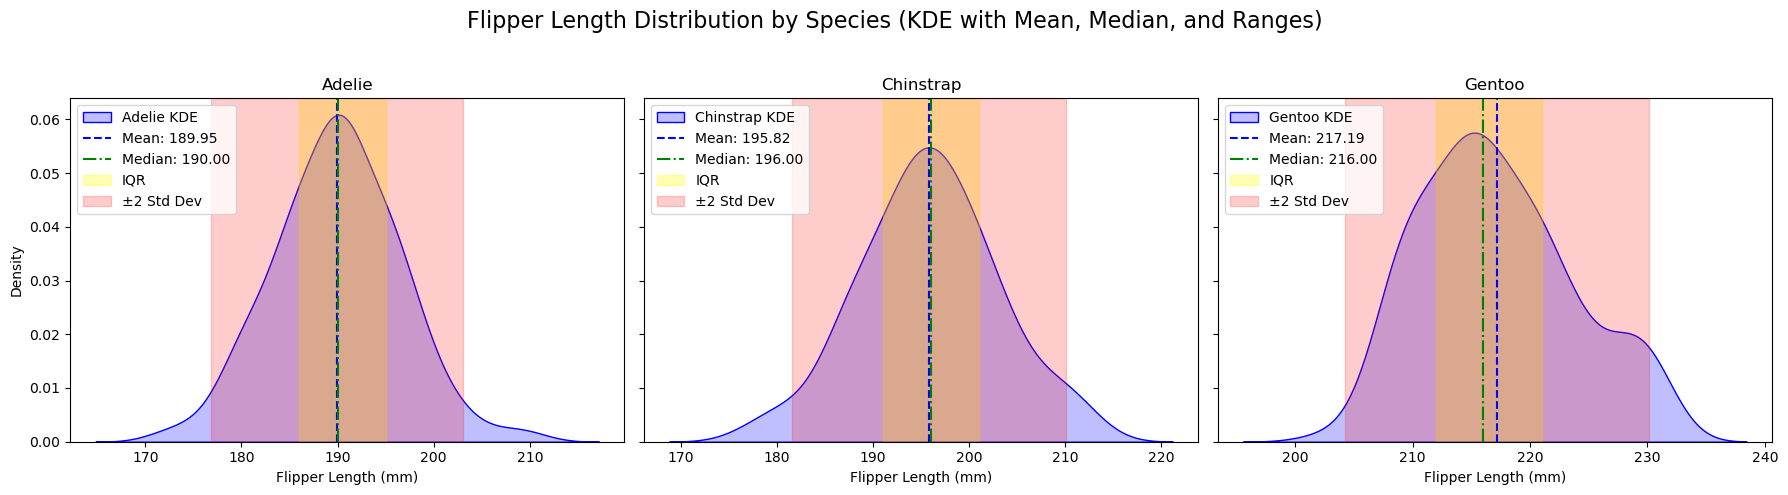

In [11]:
#2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing 'flipper_length_mm' or 'species'
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Function to calculate statistics for each species
def get_species_stats(df, species_name):
    species_df = df[df['species'] == species_name]
    mean_fl = species_df['flipper_length_mm'].mean()
    median_fl = species_df['flipper_length_mm'].median()
    min_fl = species_df['flipper_length_mm'].min()
    max_fl = species_df['flipper_length_mm'].max()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)
    std_fl = species_df['flipper_length_mm'].std()
    
    return {
        'mean': mean_fl,
        'median': median_fl,
        'min': min_fl,
        'max': max_fl,
        'q1': q1,
        'q3': q3,
        'std': std_fl
    }

# Get unique species list
species_list = penguins['species'].unique()

# Initialize the figure with 3 subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Loop through each species and create a KDE plot for each
for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    stats = get_species_stats(penguins, species)
    
    # Plot KDE for flipper length
    sns.kdeplot(species_data, ax=axes[i], fill=True, color='blue', label=f'{species} KDE')
    
    # Add vertical lines for mean and median
    axes[i].axvline(stats['mean'], color='blue', linestyle='--', label=f'Mean: {stats["mean"]:.2f}')
    axes[i].axvline(stats['median'], color='green', linestyle='-.', label=f'Median: {stats["median"]:.2f}')
    
    # Add shaded area for IQR
    axes[i].axvspan(stats['q1'], stats['q3'], color='yellow', alpha=0.3, label='IQR')
    
    # Add shaded area for ±2 std from mean
    axes[i].axvspan(stats['mean'] - 2 * stats['std'], stats['mean'] + 2 * stats['std'],
                    color='red', alpha=0.2, label='±2 Std Dev')
    
    # Set titles and labels
    axes[i].set_title(f'{species}')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].legend(loc='upper left')

# Set overall figure title and adjust layout
fig.suptitle('Flipper Length Distribution by Species (KDE with Mean, Median, and Ranges)', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.95])


In [ ]:
#3
"""Box plots show the statistic information of a dataset. Including the quartiles, whiskers and the outliers. The
plots directly tell how data distribute and the range of most of the data lying at. Histograms are bars that show
the values and the distribution of a data set. We can see different types of models and know how the data are
distributed, such as whether its skewed right or left. It focuses more on the trend and the relationship of data.
Kernel density estimater is a smooth curve that shows the problem density. It also shows the trend and the distribution
of data."""

"""For me, I really prefer the box plot.A box plot gives a concise summary of the distribution through five key 
statistics which are minimum, first quartile, median,third quartile, and maximum. It’s really important to know 
these statistics that they are normally the first step for us to know about a data. The box plot clearly shows 
outliers. Outliers are really important and are hard to see hard to spot in a histogram or KDE. Box plot is also 
easy to compare multiple distributions side-by-side, especially for different categories or groups."""

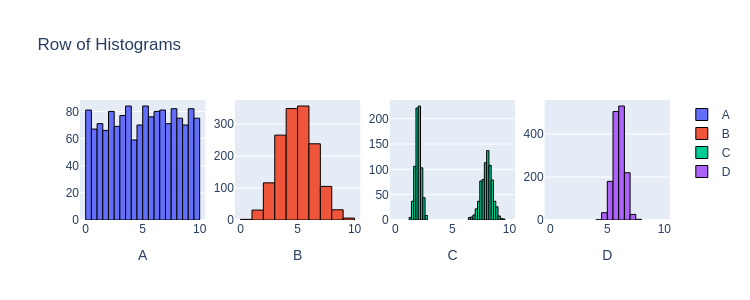

In [2]:
#4
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer = 'png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
"""
1. Plot A and Plot c have similar mean and similar variance.
2. Plot A,B and Plot B,C have similar mean, but quite different variances.
3. All plots have quite different variances, but except A and C have similar mean.
4. Plot A,D and Plot B,D have different means and different variances. """

# Summary
Today, we covered several important concepts and visualizations related to data distribution:

1. **Plotly Histograms with Statistical Markers**:
   - We explored how to create histograms for each penguin species' `flipper_length_mm` and overlay key statistics like mean, median, range, interquartile range (IQR), and two standard deviations from the mean. The original plot was cluttered, leading us to consider alternative approaches to improve clarity.

2. **Improving Clarity with Subplots**:
   - To address the messy plot, we reorganized the histograms into separate subplots for each species. This reduced overlap and provided a clearer view of the data distributions and their respective statistical markers.

3. **Kernel Density Estimator (KDE) Visualization**:
   - We replaced histograms with Kernel Density Estimator (KDE) plots to produce a smoother visualization of the data's distribution. These plots were arranged in a row of three subplots, one for each species, and overlaid with the same statistical markers (mean, median, IQR, etc.).

4. **Discussion on Visualization Techniques**:
   - You shared your insights on box plots, histograms, and KDEs, noting how each method reveals different aspects of data distribution. We discussed the pros and cons of each technique, including their strengths and limitations in representing trends, relationships, and statistical details in data.

Overall, we focused on creating clear, informative visualizations to better understand data distributions and their characteristics.

Link: https://chatgpt.com/share/66f1d581-a5b4-800d-aab5-59adcc68831b

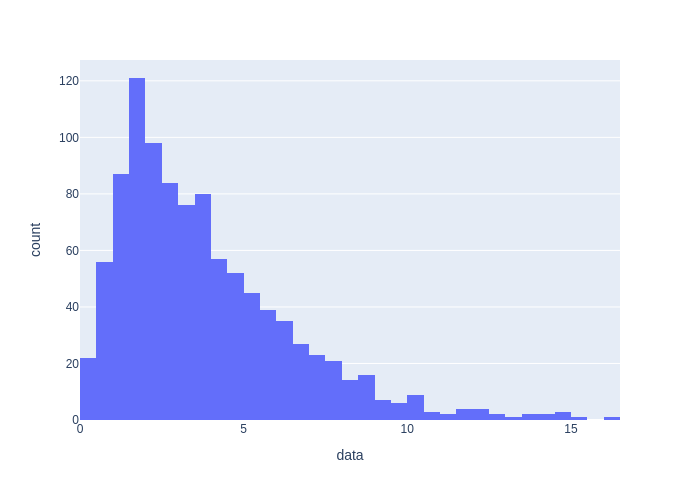

In [14]:
#Post-Lecture

#5
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

fig1.show(renderer = 'png')

In [ ]:
"""The right skewness is when most of the data are concentrated on the left. It occurs when mean>median. The left
skewness is when most of the data are concentrated on the right. It occurs when mean<median. This happens because
the different definition between mean and median. Mean can be influenced by the outliers and extreme values in a 
data. Median is the middle number of the whole data. Basically, mean will be affect a lot and cause the data to be
skewed. In the code,  generates a sample of 1000 random values from a Gamma distribution with shape parameter a=2 
and scale parameter scale=2. Gamma distributions are typically right-skewed. sample1.mean() calculate the sample's
mean. np.quantile(sample1, [0.5]) calculates the median of the sample1 dataset using np.quantile with a 0.5 
quantile."""

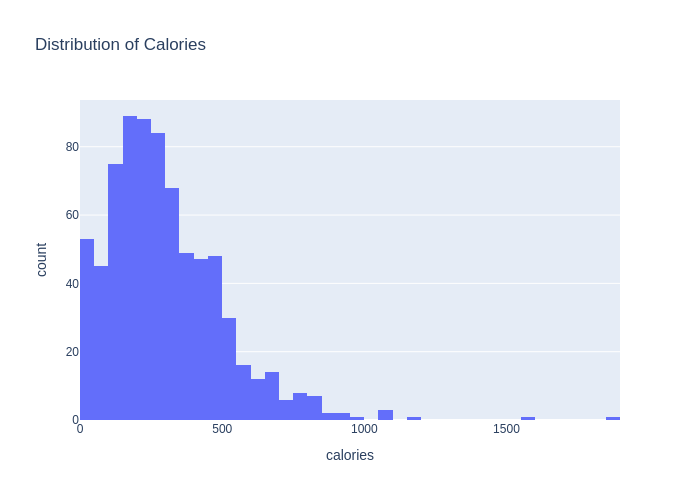

In [23]:
#6

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

import plotly.express as px

# Plot a histogram for Calories
fig1 = px.histogram(df, x='calories', title='Distribution of Calories')
fig1.show(renderer='png')


In [24]:
df

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


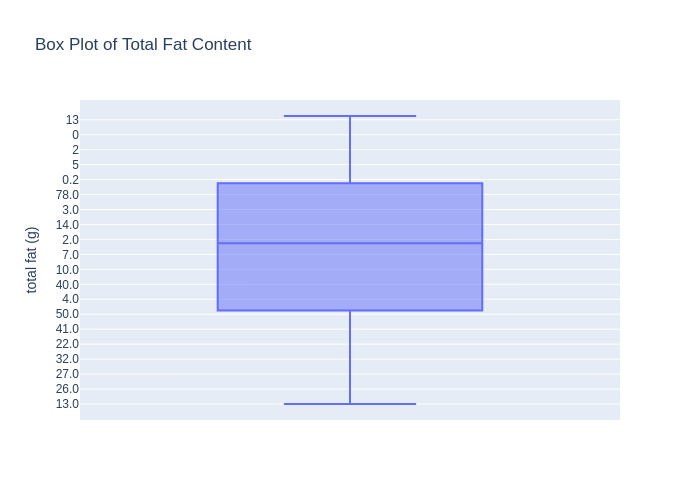

In [25]:
# Plot a box plot for Total Fat
fig2 = px.box(df, y='total fat (g)', title='Box Plot of Total Fat Content')
fig2.show(renderer='png')

restaurant id                      int64
category id                        int64
item id                            int64
serving size (oz)                float64
calories                           int64
calories from fat                float64
total fat (g)                     object
total fat (% daily value)        float64
saturated fat (g)                float64
saturated fat (% daily value)    float64
trans fat (g)                    float64
cholesterol (mg)                 float64
cholesterol (% daily value)      float64
sodium (mg)                      float64
sodium (% daily value)           float64
carbohydrates (g)                  int64
carbohydrates (% daily value)    float64
dietary fiber (g)                  int64
dietary fiber (% daily value)    float64
sugars (g)                       float64
protein (g)                      float64
vitamin a (% daily value)        float64
vitamin c (% daily value)        float64
calcium (% daily value)          float64
iron (% daily va

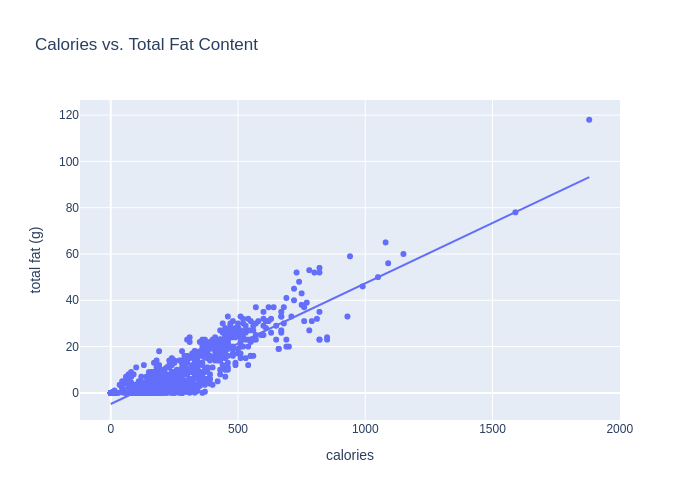

In [31]:
# Check the data types
print(df_clean.dtypes)

# Check for any remaining non-numeric values
print(df_clean[['calories', 'total fat (g)']].apply(pd.to_numeric, errors='coerce').isna().sum())

# Ensure 'calories' and 'total fat (g)' are numeric
df_clean['calories'] = pd.to_numeric(df_clean['calories'], errors='coerce')
df_clean['total fat (g)'] = pd.to_numeric(df_clean['total fat (g)'], errors='coerce')

# Drop any rows with NaN values in these columns after conversion
df_clean = df_clean.dropna(subset=['calories', 'total fat (g)'])

# Scatter plot of Calories vs. Total Fat
fig3 = px.scatter(df_clean, x='calories', y='total fat (g)', 
                  title='Calories vs. Total Fat Content',
                  trendline='ols') # Adds a trend line
fig3.show(renderer='png')

In [ ]:
"""Calories Distribution: The histogram will show if the calorie values are normally distributed or skewed, and if 
there are any outliers (e.g., extremely high-calorie meals).
Fat Content: The box plot will reveal the spread of fat content and highlight any extreme fat values, helping us 
understand the variation in fat levels across the dataset.
Calories vs. Fat Relationship: The scatter plot with a trendline will allow us to assess how well total fat 
predicts calorie content, revealing any significant correlation between the two variables."""

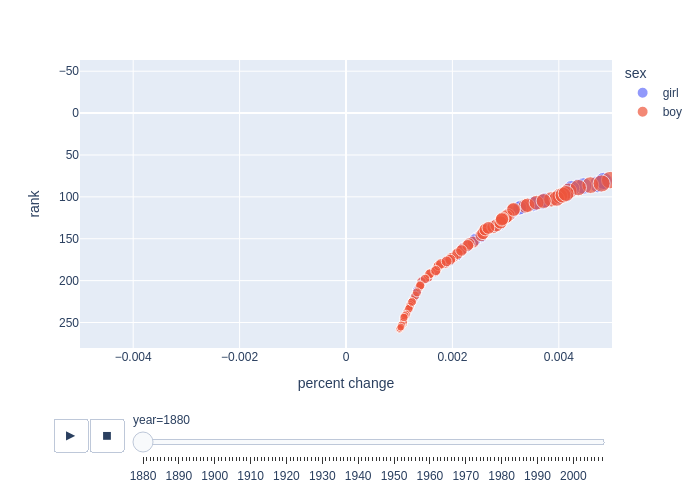

In [32]:
#8
import pandas as pd
import plotly.express as px

# Load the dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Rank names by percentage within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Sort values for the next operations
bn = bn.sort_values(['name', 'year'])

# Create the increase or decrease in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']
bn = bn.sort_values('year')

# Restrict to common names
bn = bn[bn.percent > 0.001]

# Create the scatter plot with the specified parameters
fig = px.scatter(
    bn,
    x="percent change",
    y="rank",
    size="percent",
    color="sex",
    animation_frame="year",
    animation_group="name",
    hover_name="name",
    size_max=50,
    range_x=[-0.005, 0.005]
)

# Update the y-axis to reverse the order
fig.update_yaxes(autorange='reversed')

# Show the figure
fig.show(renderer="png")  # Use this for GitHub and MarkUs submissions


# Summary
Here's a summary of our conversation today:

1. **Skewness and Central Tendency**:
   - We discussed the relationship between the mean and median in relation to right and left skewness.
   - Right skewness (positive skew) typically results in the mean being greater than the median, while left skewness (negative skew) results in the mean being less than the median.

2. **Gamma Distribution Visualization**:
   - You provided code to generate random samples from a Gamma distribution and plot histograms, box plots, and scatter plots to visualize the data.
   - We corrected the code to ensure proper column names and handle potential data issues.

3. **Fast-Food Nutritional Dataset**:
   - You loaded a dataset containing nutritional information from fast-food items.
   - We explored the dataset through summary statistics and visualizations to understand the distribution of calories and fat content.
   - We identified and addressed data cleaning issues, including converting columns to numeric and dropping rows with missing values.

4. **Final Plotting**:
   - You attempted to create a scatter plot comparing calories and total fat content, and we worked through potential issues with non-numeric data and data types.

Link: https://chatgpt.com/share/66f1e5e9-86a0-800d-ae09-a83907d16271